In [1]:
### Merge_PoreC v.s. HiC, at haplotype level
### correlation of Compartment score

## import function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import seaborn as sns

In [2]:
Rawdir="/data2/linzhuobin/Hap3D_Figures/figure_processing_data/Fig5_supp"
ma_file=f'{Rawdir}/hic_maternal_Compartment_500k.cis.vecs.tsv'
pa_file=f'{Rawdir}/hic_paternal_Compartment_500k.cis.vecs.tsv'
h1_file=f'{Rawdir}/h1_Compartment_500k.cis.vecs.tsv'
h2_file=f'{Rawdir}/h2_Compartment_500k.cis.vecs.tsv'

In [3]:
def compare_2hap_diff(h1_file,h2_file,chrom=None):
    h1=pd.read_csv(h1_file,sep='\t')
    h1=h1[['chrom','start','end','E1']]
    h2=pd.read_csv(h2_file,sep='\t')
    h2=h2[['chrom','start','end','E1']]
    E1_df=pd.merge(h1,h2,on=['chrom','start','end'])
    E1_df=E1_df.loc[E1_df.chrom==chrom,['E1_x','E1_y']]
    #E1_df=E1_df[['E1_x','E1_y']]
    E1_df.columns=['h1','h2']
    E1_df=E1_df.fillna('na')
    E1_df=E1_df.loc[(E1_df.h1!='na')&(E1_df.h2!='na'),]
    # Correlation
    pr = stats.pearsonr( E1_df.h1.values, E1_df.h2.values)
    sr = stats.spearmanr( E1_df.h1.values, E1_df.h2.values)
    print(f"N={len(E1_df)}; pr={pr[0]:.3f}; sr={sr[0]:.3f}")
    return E1_df,pr,sr

In [4]:
def compare_porec_hic_diff(pc_file,hic_file, chrom=None):
    # h1=pore-c h2 = hi-c
    h1=pd.read_csv(pc_file,sep='\t')
    h1=h1[['chrom','start','end','E1']]
    h1.chrom = h1.chrom.str.replace("chr", "")
    h2=pd.read_csv(hic_file,sep='\t')
    h2=h2[['chrom','start','end','E1']]

    E1_df=pd.merge(h1,h2,on=['chrom','start','end'])
    E1_df=E1_df.loc[E1_df.chrom==chrom,['E1_x','E1_y']]
    #E1_df=E1_df[['E1_x','E1_y']]
    E1_df.columns=['h1','h2']
    E1_df=E1_df.fillna('na')
    E1_df=E1_df.loc[(E1_df.h1!='na')&(E1_df.h2!='na'),]
    # Correlation
    pr = stats.pearsonr( E1_df.h1.values, E1_df.h2.values)
    return pr[0]

In [5]:
chrs=[f"{i}" for i in range(1,22+1)]
chrs.append('X')
## compare
Com_porec_hic=pd.DataFrame()
for c in chrs:
    print(c)
    pr1=compare_porec_hic_diff(h1_file,ma_file,c)
    pr2=compare_porec_hic_diff(h1_file,pa_file,c)
    pr3=compare_porec_hic_diff(h2_file,ma_file,c)
    pr4=compare_porec_hic_diff(h2_file,pa_file,c)
    stat=pd.DataFrame({'h1_ma':abs(pr1),
                       'h1_pa':abs(pr2),
                       'h2_ma':abs(pr3),
                       'h2_pa':abs(pr4)},index=[0])
    Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
Com_porec_hic['chrom']=chrs
Com_porec_hic

1
2


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


3
4


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


5
6


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


7
8


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


9
10


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


11
12


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


13
14


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


15
16


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


17
18


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


19
20


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


21
22


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)
/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


X


/tmp/ipykernel_6548/1824417780.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Com_porec_hic=Com_porec_hic.append(stat, ignore_index=True)


,h1_ma,h1_pa,h2_ma,h2_pa,chrom
0,0.990393,0.989313,0.988494,0.988956,1
1,0.986820,0.985070,0.982405,0.985879,2
2,0.986651,0.982310,0.983733,0.984543,3
3,0.973597,0.966311,0.972967,0.975670,4
4,0.979506,0.976267,0.976026,0.979633,5
5,0.985982,0.980304,0.981590,0.982485,6
6,0.982563,0.983789,0.981491,0.986119,7
7,0.981891,0.978958,0.973912,0.976876,8
8,0.977237,0.977887,0.973340,0.978588,9
9,0.978457,0.967062,0.977473,0.972920,10


In [32]:
# # h1 and h2 assign to paternal and maternal
# Com_porec_hic["h1"] = "maternal"
# Com_porec_hic["h2"] = "paternal"
# P1 = Com_porec_hic["h1_ma"] < Com_porec_hic["h2_ma"]
# Com_porec_hic.loc[P1, "h2"] = "maternal"
# P2 = Com_porec_hic["h1_pa"] > Com_porec_hic["h2_pa"]
# Com_porec_hic.loc[P2, "h1"] = "paternal"

# ## reassign
# Ps = Com_porec_hic["h1"] == Com_porec_hic["h2"] 
# P1 = Com_porec_hic["h1_ma"] < Com_porec_hic["h1_pa"]
# Com_porec_hic.loc[P1&Ps, "h1"] = "paternal"
# Com_porec_hic.loc[(~P1)&Ps, "h1"] = "maternal"
# P2 = Com_porec_hic["h2_ma"] < Com_porec_hic["h2_pa"]
# Com_porec_hic.loc[P2&Ps, "h2"] = "paternal"
# Com_porec_hic.loc[(~P2)&Ps, "h2"] = "maternal"

# Com_porec_hic["chrom"] = [f"chr{i}" for i in Com_porec_hic.chrom.values ]
# exportfile = "/data2/linzhuobin/Hap3D_Figures/figure_processing_data/Haplotage_assigned_compartment_corr.csv"
# Com_porec_hic.loc[:, ["chrom", "h1", "h2"] ].to_csv(exportfile, header=True, sep="\t", index=False)
#Com_porec_hic

In [6]:
chrs=[f"chr{i}" for i in range(1,22+1)]
chrs.append('chrX')

In [7]:
porec_stats=pd.DataFrame()
for c in chrs:
    print(c)
    E1_df,pr,sr=compare_2hap_diff(h1_file,h2_file,c)
    stat=pd.DataFrame({'pr':abs(pr[0]),'sr':abs(sr[0])},index=[0])
    porec_stats=porec_stats.append(stat, ignore_index=True)
porec_stats['chrom']=chrs

chr1
N=431; pr=0.995; sr=0.994
chr2
N=459; pr=0.993; sr=0.992
chr3
N=380; pr=0.993; sr=0.989
chr4
N=366; pr=0.985; sr=0.973
chr5
N=345; pr=0.990; sr=0.987
chr6


/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecate

N=325; pr=0.993; sr=0.990
chr7
N=289; pr=0.993; sr=0.991
chr8
N=273; pr=0.989; sr=0.986
chr9
N=208; pr=-0.991; sr=-0.988
chr10
N=253; pr=-0.989; sr=-0.987
chr11
N=241; pr=-0.994; sr=-0.993
chr12
N=256; pr=0.994; sr=0.991
chr13
N=185; pr=0.984; sr=0.981
chr14
N=167; pr=0.989; sr=0.986
chr15


/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecate

N=155; pr=0.987; sr=0.988
chr16
N=134; pr=0.987; sr=0.989
chr17
N=146; pr=0.993; sr=0.993
chr18
N=148; pr=0.985; sr=0.977
chr19
N=109; pr=0.996; sr=0.989
chr20
N=113; pr=0.990; sr=0.988
chr21
N=59; pr=0.940; sr=0.948
chr22
N=64; pr=0.974; sr=0.962
chrX
N=291; pr=-0.497; sr=-0.553


/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porec_stats=porec_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/2925908550.py:6: FutureWarning: The frame.append method is deprecate

In [9]:
chrs=[f"{i}" for i in range(1,22+1)]
chrs.append('X')
hic_stats=pd.DataFrame()
for c in chrs:
    print(c)
    E1_df,pr,sr=compare_2hap_diff(ma_file,pa_file,c)
    stat=pd.DataFrame({'pr':abs(pr[0]),'sr':abs(sr[0])},index=[0])
    hic_stats=hic_stats.append(stat, ignore_index=True)
hic_stats['chrom']=chrs

1
N=444; pr=0.998; sr=0.998
2
N=470; pr=-0.995; sr=-0.994
3
N=386; pr=0.997; sr=0.995
4
N=375; pr=0.993; sr=0.985
5
N=350; pr=0.995; sr=0.994
6


/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be re

N=336; pr=0.996; sr=0.995
7
N=304; pr=-0.995; sr=-0.993
8
N=283; pr=0.996; sr=0.995
9
N=219; pr=0.997; sr=0.996
10
N=260; pr=0.993; sr=0.992
11
N=264; pr=0.997; sr=0.996
12
N=259; pr=0.997; sr=0.995
13
N=192; pr=0.989; sr=0.985
14


/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be re

N=174; pr=0.989; sr=0.986
15
N=159; pr=0.990; sr=0.991
16
N=158; pr=0.998; sr=0.997
17
N=157; pr=0.998; sr=0.996
18
N=149; pr=-0.994; sr=-0.993
19
N=112; pr=0.997; sr=0.994
20
N=118; pr=-0.997; sr=-0.995
21
N=67; pr=0.987; sr=0.983
22
N=68; pr=0.987; sr=0.983
X
N=296; pr=0.077; sr=0.080


/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hic_stats=hic_stats.append(stat, ignore_index=True)
/tmp/ipykernel_6548/4227303810.py:8: FutureWarning: The frame.append method is deprecated and will be re

In [10]:
# Correlation
pr = stats.pearsonr( hic_stats.pr.values, porec_stats.pr.values)
sr = stats.spearmanr( hic_stats.pr.values, porec_stats.pr.values)
print(pr)
print(sr)

(0.9951068989811145, 1.3424100066844118e-22)
SpearmanrResult(correlation=0.7776679841897233, pvalue=1.259483943737122e-05)


In [11]:
df=pd.DataFrame({'hic':hic_stats['pr'],'porec':porec_stats['pr'],'chrom':chrs})
df#.head()

,hic,porec,chrom
0,0.997848,0.994931,1
1,0.995337,0.993042,2
2,0.996674,0.993302,3
3,0.992586,0.984675,4
4,0.995317,0.990374,5
5,0.995698,0.992508,6
6,0.994903,0.992998,7
7,0.995787,0.988697,8
8,0.996942,0.990967,9
9,0.993218,0.989042,10


In [12]:
outdir="/data2/linzhuobin/Hap3D_Figures/pdf"

In [13]:
X=hic_stats['pr']
Y=porec_stats['pr']
X_train=np.array(X).reshape((len(X),1))
Y_train=np.array(Y).reshape((len(Y),1))

lineModel = LinearRegression()
lineModel.fit(X_train,Y_train)

Y_predict=lineModel.predict(X_train)

a1 = lineModel.coef_[0][0]
b = lineModel.intercept_[0]
print("y=%.4f*x+%.4f" % (a1,b))
print("eval",lineModel.score(X_train,Y_train))

y=0.5350*x+0.4555
eval 0.9902377403998099


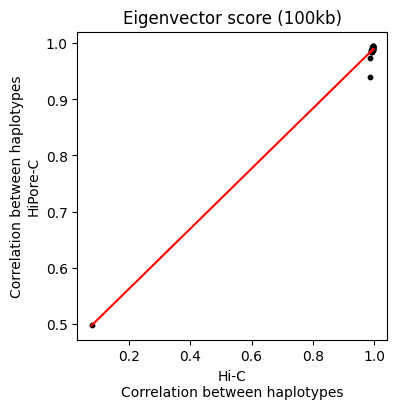

In [14]:
plt.figure(figsize = (4,4)) 
plt.scatter(hic_stats['pr'],porec_stats['pr'],c='k',s=10)
plt.plot(X,Y_predict,c='r')
plt.title("Eigenvector score (100kb)")
plt.xlabel("Hi-C\nCorrelation between haplotypes")
plt.ylabel("Correlation between haplotypes\nHiPore-C")
#plt.text(0.97,0.9, "Pearson rho = %.3f\nSpearman rho = %.3f"%(pr[0],sr[0]), ha="left", va="center" )
#plt.text(0.97,0.88, "y=%.4f*x+%.4f" % (a1,b), ha="left", va="center" )
#plt.ylim(0.85,1.005)
#plt.yticks([0.85,0.9,0.95,1.0])
fig=outdir+"PoreC_vs_HiC.Compartment_score_500kb"+".haplotype_difference"+"_1.pdf"
#plt.savefig(fig,bbox_inches = 'tight')

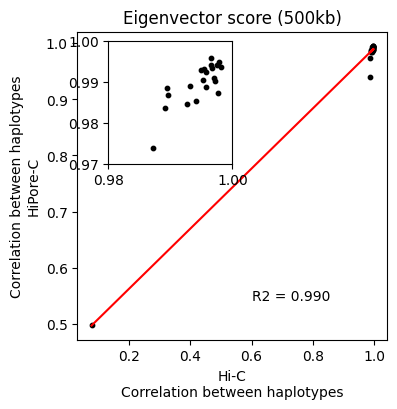

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(hic_stats['pr'],porec_stats['pr'],c='k',s=10)
ax.plot(X,Y_predict,c='r')
plt.title("Eigenvector score (500kb)")
plt.xlabel("Hi-C\nCorrelation between haplotypes")
plt.ylabel("Correlation between haplotypes\nHiPore-C")
plt.text(0.6,0.55, "R2 = %.3f"%(0.990), ha="left", va="center" )
#plt.text(0.97,0.88, "y=%.4f*x+%.4f" % (a1,b), ha="left", va="center" )
#plt.ylim(0.85,1.005)
#plt.yticks([0.85,0.9,0.95,1.0])

axins = ax.inset_axes((0.1,0.57,0.4,0.4))
axins.scatter(hic_stats['pr'][:-1],porec_stats['pr'][:-1],c='k',s=10)
axins.set_xlim(0.98,1)
axins.set_ylim(0.97,1)

#plt.show()
fig=outdir+"/"+"PoreC_vs_HiC.Compartment_score_500kb"+".haplotype_difference"+"_1.pdf"
plt.savefig(fig,bbox_inches = 'tight')

In [ ]:
res,file='10k','Insulation'
ma_file='/'.join(['/data2/linzhuobin/Temp/hi-c_hg19/maternal',res,file])
pa_file='/'.join(['/data2/linzhuobin/Temp/hi-c_hg19/paternal',res,file])
h1_file='/data1/LLR/pairwise_contact/hg19/trans/porec_maternal/CallScores/Insulation_maternal'
h2_file='/data1/LLR/pairwise_contact/hg19/trans/porec_paternal/CallScores/Insulation_paternal'